In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import scipy.stats as st

In [2]:
# sand only
sand_good = pd.read_csv('data/mined-data/sand-change-(good)/sand-only/all.dat', sep=",")
sand_08 = pd.read_csv('data/mined-data/new/08-10-2020-1/all.dat', sep=",")
sand_121 = pd.read_csv('data/mined-data/new/12-10-2020-1/all.dat', sep=",")
sand_122 = pd.read_csv('data/mined-data/new/12-10-2020-2/all.dat', sep=",")
sand_231 = pd.read_csv('data/mined-data/new/23-10-2020-1/all.dat', sep=",")

# buried
buried_good = pd.read_csv('data/mined-data/sand-change-(good)/buried/all.dat', sep=",")

buried_082_near_1 = pd.read_csv('data/mined-data/new/08-10-2020-2/all.dat', sep=",")
buried_083_10cm_2 = pd.read_csv('data/mined-data/new/08-10-2020-3/all.dat', sep=",")
buried_084_10cm_3 = pd.read_csv('data/mined-data/new/08-10-2020-4/all.dat', sep=",")
buried_085_18cm_4 = pd.read_csv('data/mined-data/new/08-10-2020-5/all.dat', sep=",")
buried_086_8cm_4 = pd.read_csv('data/mined-data/new/08-10-2020-6/all.dat', sep=",")

buried_123_7cm_1 = pd.read_csv('data/mined-data/new/12-10-2020-3/all.dat', sep=",")
buried_124_7cm_1 = pd.read_csv('data/mined-data/new/12-10-2020-4/all.dat', sep=",")
buried_125_7cm_3 = pd.read_csv('data/mined-data/new/12-10-2020-5/all.dat', sep=",")

buried_161_up_1 = pd.read_csv('data/mined-data/new/16-10-2020-1/all.dat', sep=",")
buried_162_up_1 = pd.read_csv('data/mined-data/new/16-10-2020-2/all.dat', sep=",")
buried_163_down_1 = pd.read_csv('data/mined-data/new/16-10-2020-3/all.dat', sep=",")
buried_164_down_1 = pd.read_csv('data/mined-data/new/16-10-2020-4/all.dat', sep=",")

buried_211_down_1 = pd.read_csv('data/mined-data/new/21-10-2020-1/all.dat', sep=",")
buried_212_down_1 = pd.read_csv('data/mined-data/new/21-10-2020-2/all.dat', sep=",")
buried_213_up_1 = pd.read_csv('data/mined-data/new/21-10-2020-3/all.dat', sep=",")
buried_214_up_1 = pd.read_csv('data/mined-data/new/21-10-2020-4/all.dat', sep=",")

In [3]:
sand_all = [sand_good, sand_08, sand_121, sand_122, sand_231]
buried_all = [buried_good, buried_211_down_1, buried_212_down_1, buried_213_up_1, buried_214_up_1]

In [4]:
sand = np.concatenate(tuple(sand_all))
buried = np.concatenate(tuple(buried_all))
print('sand:', len(sand))
print('buried:', len(buried))

sand: 16484
buried: 15404


In [5]:
X = np.concatenate((sand, buried))
Y = [0] * len(sand) + [1] * len(buried)

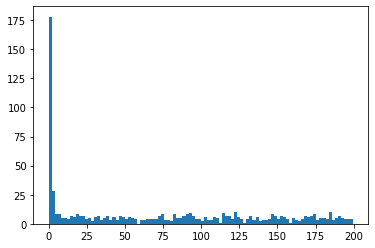

In [6]:
exp_rvs = st.uniform(0, 200).rvs(size=500)
uni_rvs = st.expon.rvs(size=200)

rvs = np.concatenate((exp_rvs, uni_rvs))
plt.hist(rvs, bins=100)
plt.show()

In [7]:
# create random parameters
parameters = {
    'penalty': ['l1', 'l2'],
    'C': rvs,
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear', 'saga'],
    'max_iter': 100 + np.random.rand(100) * 200
}

In [8]:
random_model = RandomizedSearchCV(estimator=LogisticRegression(random_state=68),
                                  random_state=68,
                                  param_distributions=parameters,
                                  cv=5,
                                  scoring='accuracy',
                                  verbose=10,
                                  n_jobs=4,
                                  n_iter=200)

In [9]:
random_model.fit(X, Y)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 34.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 35.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 36.9min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 39.4min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 48.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 61.1min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 65.3min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 69.7min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 85.0min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 87.8min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 90.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 106.6min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 120.9min
[Paralle

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=68),
                   n_iter=200, n_jobs=4,
                   param_distributions={'C': array([1.21731124e+02, 1.91128310e+02, 4.82953978e+01, 5.22910477e+01,
       1.88138757e+02, 1.99195516e+01, 8.53103994e+01, 1.51868045e+02,
       1.18089913e+02, 1.79242982e+02, 1.70792338e+02, 4.71257310e+01,
       1.67872844e+02, 1.90761818e+02, 1.94752143e+02, 2.2...
       113.54629492, 229.93467543, 110.69031159, 114.60182156,
       265.36477324, 248.87170495, 288.24383667, 185.56352225,
       161.5975337 , 147.88437401, 278.91265693, 143.0434733 ,
       159.56573045, 298.62437636, 218.29554632, 258.17397001,
       113.25644367, 255.22893939, 288.9185483 , 234.80511968]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=68, scoring='accuracy', verbose=10)

In [10]:
random_model.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 201.41742907853478,
 'class_weight': None,
 'C': 183.97024333430912}

In [27]:
random_model.best_score_

0.8075727863928522

In [28]:
random_model.best_index_

88

In [34]:
str(random_model.refit_time_/60) + " minutes"

'13.198676399389903 minutes'

In [51]:
print(random_model.score(buried_082_near_1, [1] * len(buried_082_near_1))) #
print(random_model.score(buried_083_10cm_2, [1] * len(buried_083_10cm_2))) #
print(random_model.score(buried_084_10cm_3, [1] * len(buried_084_10cm_3))) #
print(random_model.score(buried_085_18cm_4, [1] * len(buried_085_18cm_4))) #
print(random_model.score(buried_086_8cm_4, [1] * len(buried_086_8cm_4))) #
print(random_model.score(buried_123_7cm_1, [1] * len(buried_123_7cm_1))) #
print(random_model.score(buried_124_7cm_1, [1] * len(buried_124_7cm_1))) #
print(random_model.score(buried_125_7cm_3, [1] * len(buried_125_7cm_3))) #
print(random_model.score(buried_161_up_1, [1] * len(buried_161_up_1)))
print(random_model.score(buried_162_up_1, [1] * len(buried_162_up_1)))
print(random_model.score(buried_163_down_1, [1] * len(buried_163_down_1)))
print(random_model.score(buried_164_down_1, [1] * len(buried_164_down_1)))

0.0722521137586472
0.006246096189881324
0.27651304830649637
0.22514466070489217
0.0149812734082397
0.315230961298377
0.49441504997060554
0.30031347962382443
0.919080919080919
0.8137044967880086
0.8763440860215054
0.8551448551448552
